In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline


In [16]:
date_ranges = [
    "1/1/2019 - 3/31/2019, Every day, Daily Average",
    "4/1/2019 - 6/30/2019, Every day, Daily Average",
]

bart_names = [
    "Embarcadero, San Francisco, CA", 
    "2nd Street and Stevenson Street (Montgomery BART, San Francisco, CA",
    "Powell BART Station, Market St and Powell St, San Francisco, CA"
]

hotspot_names = [
    "Fisherman's Wharf, San Francisco, CA",
    "Oracle Park, 24 Willie Mays Plaza, San Francisco, CA",
    "The Palace Of Fine Arts, 3601 Lyon St, San Francisco, CA"
]

times_of_day = ['AM', 'PM', 'Midday', 'Evening', 'Early Morning']
times_of_day_fine = ['Early Morning', 'Midday', 'Evening']

In [11]:

def get_df_from_date_range(df, date):
    return df[df['Date Range'] == date]


barts_to_all = pd.read_csv("data/barts_to_all.csv")

# dfs_by_date = [get_df_from_date_range(barts_to_all, date) for date in date_ranges]

In [12]:
def get_bart_to_hotspots(df, bart_names, hotspot_names):

    temp = df[df['Origin Display Name'].isin(bart_names)]
    
    return temp[temp['Destination Display Name'].isin(hotspot_names)]

barts_hotspots = pd.read_csv("data/barts_hotspots.csv")

only_barts_to_hotspot = get_bart_to_hotspots(barts_hotspots, bart_names, hotspot_names)

In [13]:
def get_week_day_from_date(date):
    # returns weekday as int
    
    import datetime
    
    split = date.split("/")
    
    year = int(split[-1])
    day = int(split[0])
    month = int(split[1])
    
    return datetime.datetime(year, day, month).weekday()

def bart_recommendation(only_barts_to_hotspot, hotspot, weekday, time_of_day):
    # get recom by date and time
    transform_dates_to_weekdays = only_barts_to_hotspot
    transform_dates_to_weekdays['Week Day'] = transform_dates_to_weekdays['Date'].apply(get_week_day_from_date)
    
    barts_to_hotspot_specific_weekday = transform_dates_to_weekdays[transform_dates_to_weekdays['Week Day'] == weekday]
    barts_to_hotspot_specific_weekday = barts_to_hotspot_specific_weekday[barts_to_hotspot_specific_weekday['Destination Display Name'] == hotspot]    
    barts_to_hotspot_specific_weekday = barts_to_hotspot_specific_weekday[barts_to_hotspot_specific_weekday[time_of_day + ' Mean Travel Time (Seconds)'] == barts_to_hotspot_specific_weekday[time_of_day + ' Mean Travel Time (Seconds)'].min()]
    
    return barts_to_hotspot_specific_weekday['Origin Display Name']
    
bart_recommendation(only_barts_to_hotspot, "Fisherman's Wharf, San Francisco, CA", 0, 'AM')

2067    Embarcadero, San Francisco, CA
Name: Origin Display Name, dtype: object

In [15]:
barts_hotspots.shape

(3258, 23)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


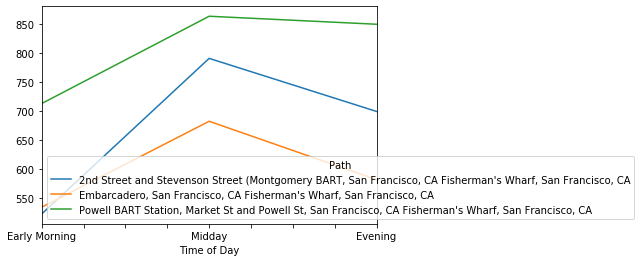

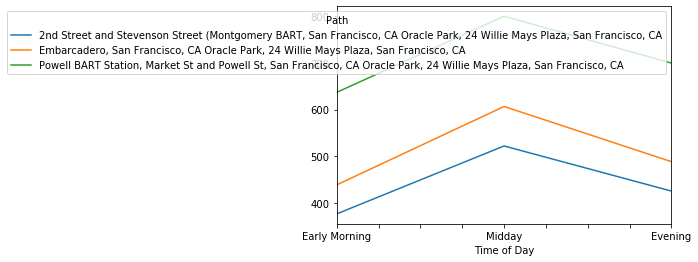

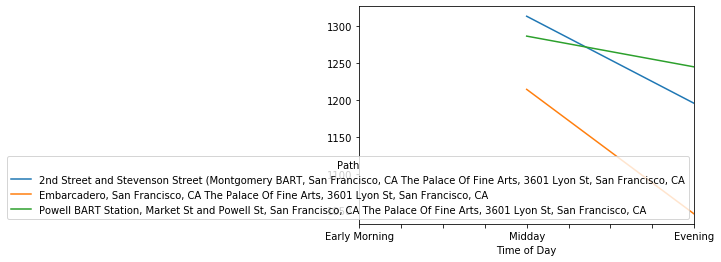

In [52]:
# part 1.2
# Compare and contrast travel times between different BART stations and Hotspots based on these factors: time of day, day of the week, and the direction of travel. 
# a. Consider restructuring the data on the basis of some of the previously listed factors.

def compare_and_contrast_bart_to_different_hotspots_by_time_of_day(df, bart_names, hotspots):
    result = pd.DataFrame(columns=['Average Time', 'Time of Day', 'Path'])
    
    for hotspot in hotspots:
        df1 = df[df['Destination Display Name'] == hotspot]
        sub_result = pd.DataFrame(columns=['Average Time', 'Time of Day', 'Path'])

        for bart_name in bart_names:
            df2 = df1[df1['Origin Display Name'] == bart_name]

            for time_of_day_index, time_of_day in enumerate(times_of_day_fine):
                entry = {
                    'Average Time' : df2[time_of_day + ' Mean Travel Time (Seconds)'].mean(),
                    'Time of Day' : time_of_day,
                    'Path' : bart_name + " " + hotspot,
                }

                result = result.append(entry, ignore_index=True)
                sub_result = sub_result.append(entry, ignore_index=True)
                
        sub_result.pivot_table(index='Time of Day', columns='Path',values= 'Average Time').loc[times_of_day_fine].plot()

    return result

result = compare_and_contrast_bart_to_different_hotspots_by_time_of_day(only_barts_to_hotspot, bart_names, hotspot_names)
# result.pivot(['Bart Name', 'HotSpot']).plot()
# result.pivot_table(index='Time of Day', columns='Path',values= 'Average Time').plot()